In [14]:
import pandas as pd

In [62]:
ny = pd.read_csv("../data/nyc-covid.csv")
ny = ny[["date", "deaths"]]
ny["region"] = "NYC"
# ny["deaths"] = ny["deaths"].cumsum()
ny.head(n=4)

,date,deaths,region
0,2020-02-29,0,NYC
1,2020-03-01,0,NYC
2,2020-03-02,0,NYC
3,2020-03-03,0,NYC


In [63]:
countries = pd.read_csv("../data/worldometers.csv")
sweden = countries[countries.country == "sweden"]
sweden = sweden[sweden["var"] == "deaths"]
cols = ["datetime", "cases", "var"]
sweden = sweden[cols]
sweden["region"] = "Sweden"
assert (sweden["var"] == "deaths").all()
sweden = sweden.drop(columns="var")
sweden.columns = ["date", "deaths", "region"]
sweden = sweden.sort_values(by="date")
sweden["deaths"] = sweden["deaths"].diff()
sweden.head()

,date,deaths,region
507,2020-02-15,NaN,Sweden
508,2020-02-16,0.0,Sweden
509,2020-02-17,0.0,Sweden
510,2020-02-18,0.0,Sweden
511,2020-02-19,0.0,Sweden


From https://en.wikipedia.org/wiki/Demographics_of_New_York_City and
https://en.wikipedia.org/wiki/Demographics_of_Sweden

In [64]:
stats = {
    "NYC": {"population": 8336817, "over_65": 0.12},
    "Sweden": {"population": 10040995, "over_65": 0.2026},
}

In [65]:
stats["NYC"]["population"] / stats["Sweden"]["population"]

0.830277975439685

In [66]:
df = pd.concat((sweden, ny))

for r in ["Sweden", "NYC"]:
    idx = df["region"] == r
    df.loc[idx, "death_rate"] = df.loc[idx, "deaths"] / stats[r]["population"]
    df.loc[idx, "death_rate_elderly"] = df.loc[idx, "death_rate"] / stats[r]["over_65"]

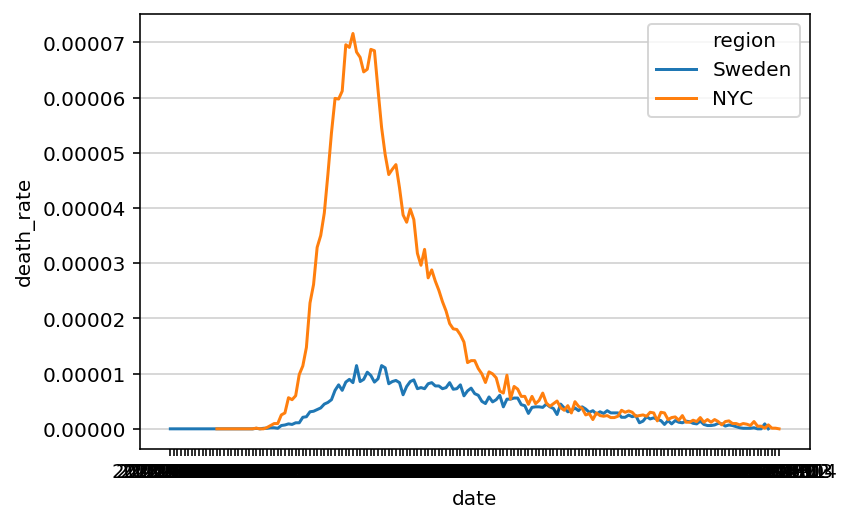

In [68]:
import seaborn as sns

ax = sns.lineplot(
    data=df,
    x="date",
    y="death_rate",
    hue="region",
)
# ax.set_yscale("log")
ax.grid(alpha=0.6, axis="y")